<a href="https://colab.research.google.com/github/nawroz-m/ML_learning/blob/main/food_101_CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the dataset from https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [ ]:
# source: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2025-10-20 13:20:58--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2025-10-20 13:20:59--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  17.5MB/s    in 4m 37s  

2025-10-20 13:25:36 (17.2 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



# Since the imported file is in tar let's extract it

In [ ]:
import tarfile
zip_dir = tarfile.open('food-101.tar.gz')
zip_dir.extractall()
zip_dir.close()

/tmp/ipython-input-4096493359.py:3: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  zip_dir.extractall()


In [ ]:
# Check the number of filse and folders
import os
images_dir = 'food-101/images'
for dirpath, dirnames, filenames in os.walk(images_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath} ")

There are 101 directories and 0 files in food-101/images 
There are 0 directories and 1000 files in food-101/images/sashimi 
There are 0 directories and 1000 files in food-101/images/falafel 
There are 0 directories and 1000 files in food-101/images/fish_and_chips 
There are 0 directories and 1000 files in food-101/images/guacamole 
There are 0 directories and 1000 files in food-101/images/frozen_yogurt 
There are 0 directories and 1000 files in food-101/images/seaweed_salad 
There are 0 directories and 1000 files in food-101/images/filet_mignon 
There are 0 directories and 1000 files in food-101/images/pork_chop 
There are 0 directories and 1000 files in food-101/images/creme_brulee 
There are 0 directories and 1000 files in food-101/images/nachos 
There are 0 directories and 1000 files in food-101/images/sushi 
There are 0 directories and 1000 files in food-101/images/clam_chowder 
There are 0 directories and 1000 files in food-101/images/club_sandwich 
There are 0 directories and 10

In [ ]:
!ls food-101/images


apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

# Get ready the dataset to the train and test dataset

In [ ]:
classes = os.listdir(images_dir)
len(classes), classes[:5]


(101, ['sashimi', 'falafel', 'fish_and_chips', 'guacamole', 'frozen_yogurt'])

# Get labels (in Json format)

In [ ]:
import json
# get label
def get_labels(label_path):

  """
  Accept a label path in the form of a JSON and return the file as a python objec.
  """
  with open(label_path) as f:
    return json.load(f)
train_labels = get_labels("food-101/meta/train.json")
test_labels = get_labels("food-101/meta/test.json")

In [ ]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [ ]:
images_dir

'food-101/images'

In [ ]:
# Create target class folder and move images there
import shutil

def copy_images(parent_folder, new_subset, dataset, target_labels):
  """
  Copies `labels[target_labels]` images from `parent_folder` to the `new_subset` named after `dataset` folder
  E.g. Move steak images to data/steack_subset/train & data/steack_subset/test

  Parameter
  ---------
  parent_folder(str) - original folder path with all data
  new_subset(str) - name of parent folder to copy to
  dataset(str) - which dataset?  train or test
  labels(list) - list of train or test labels
  target_labels(list) - list of target labels to copy e.g. ["steak", "pizza"]
  """
  # Get the aproperiet labels
  print(f"\n Using {dataset} labels...")
  labels = get_labels("food-101/meta/" + dataset + ".json")
  for i in target_labels:
    # Make target directory
    os.makedirs(parent_folder + "/" + new_subset + "/" + dataset + "/" + i,
                    exist_ok=True)
    # Go throug the labels and get the aproperiet classes
    image_move = [] # keep track of images moved
    for j in labels[i]:
      # Create original image path and new path
      og_path = images_dir + '/' + j + ".jpg"
      new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"
      # Copy image from old path to the new path
      shutil.copy2(og_path, new_path)
      image_move.append(new_path)
    print(f"Copied {len(image_move)} images from {dataset} dataset {i} class...")


# Split the whole dataset into training and testing

In [ ]:
datasets = ['train', 'test']
parent_folder = "data"
new_subset = "food-101"

for i in datasets:
  copy_images(parent_folder= parent_folder,
              new_subset=new_subset,
              dataset=i,
              target_labels=classes)



 Using train labels...
Copied 750 images from train dataset sashimi class...
Copied 750 images from train dataset falafel class...
Copied 750 images from train dataset fish_and_chips class...
Copied 750 images from train dataset guacamole class...
Copied 750 images from train dataset frozen_yogurt class...
Copied 750 images from train dataset seaweed_salad class...
Copied 750 images from train dataset filet_mignon class...
Copied 750 images from train dataset pork_chop class...
Copied 750 images from train dataset creme_brulee class...
Copied 750 images from train dataset nachos class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset clam_chowder class...
Copied 750 images from train dataset club_sandwich class...
Copied 750 images from train dataset cannoli class...
Copied 750 images from train dataset gyoza class...
Copied 750 images from train dataset cheese_plate class...
Copied 750 images from train dataset chocolate_cake class...
Copied 

# plot a  random test images from each class

In [ ]:
# set the test and train directory
test_dir = 'data/food-101/test'
train_dir = 'data/food-101/train'

import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

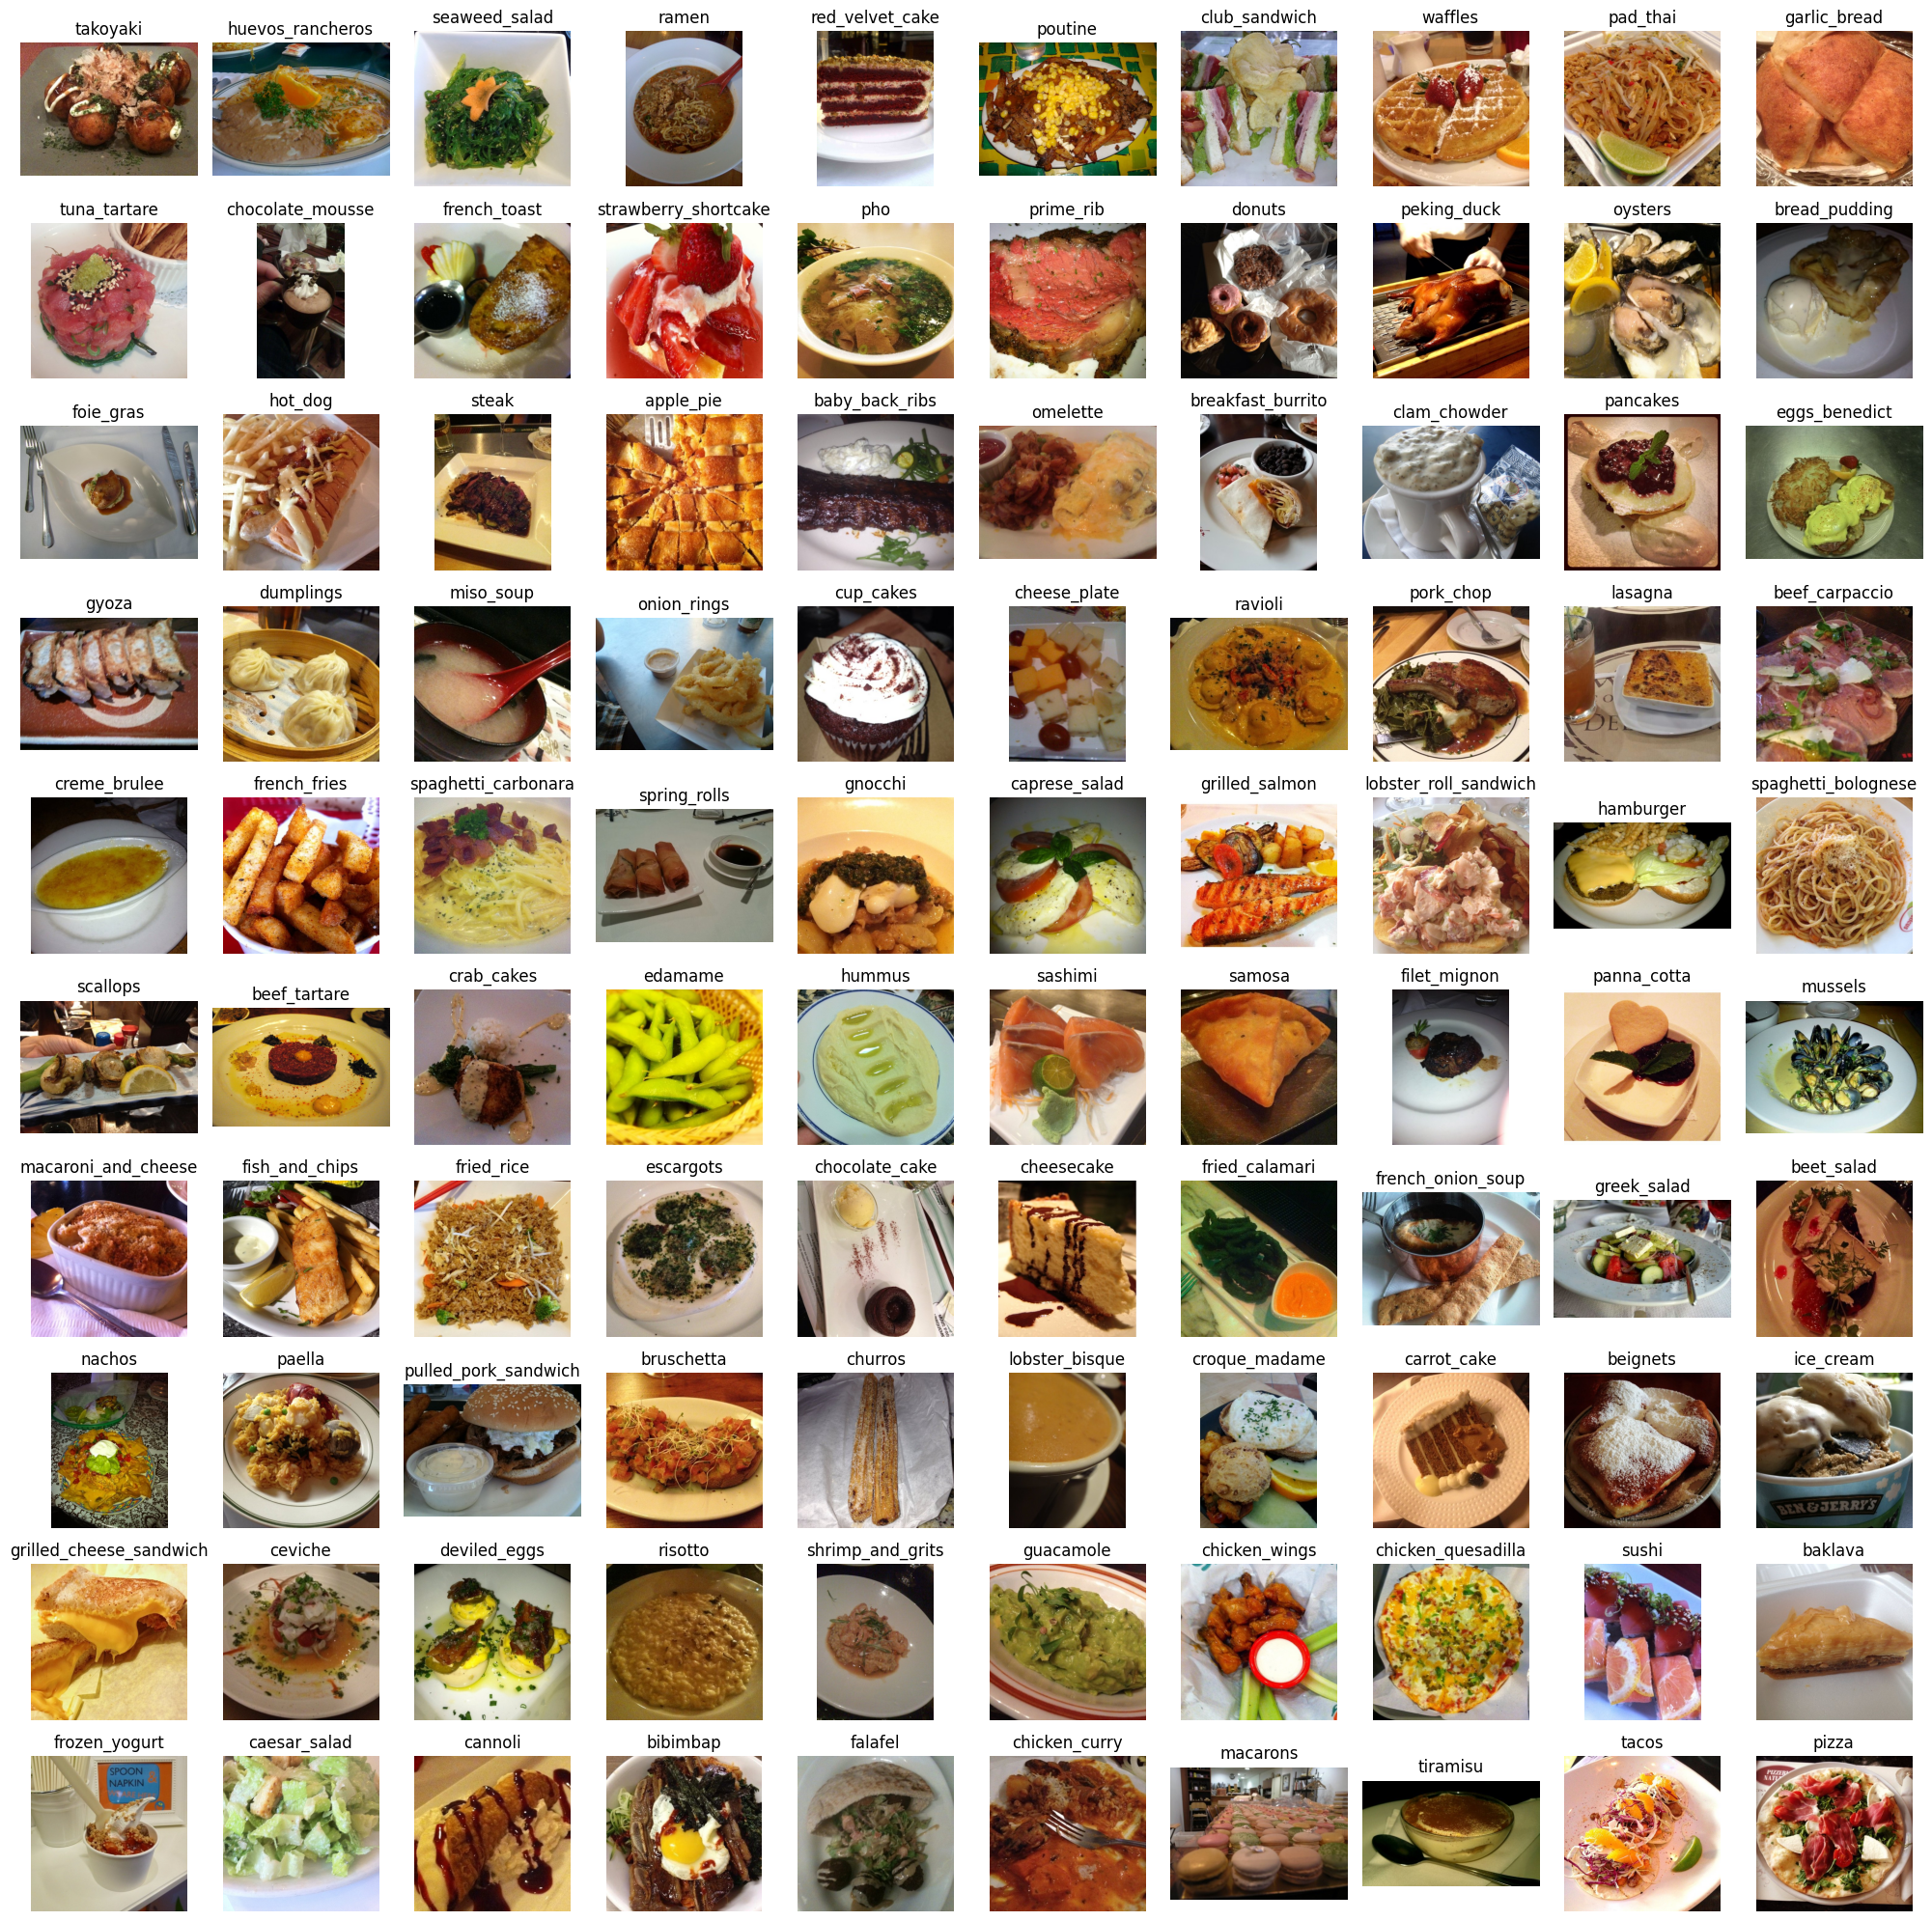

In [ ]:
# Select how many random classes you want to show
num_classes_to_show = 100
selected_classes = random.sample(classes, num_classes_to_show)
# Create the plot
plt.figure(figsize=(20, 20))

for i, class_name in enumerate(selected_classes):
    # Get one random image from this class
    class_dir = os.path.join(test_dir, class_name)
    image_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_name)

    # Read and plot image
    img = mpimg.imread(image_path)
    plt.subplot(10, 10, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()

# Prepare the training and testing dataset

In [ ]:
train_dir, test_dir

('data/food-101/train', 'data/food-101/test')

In [ ]:
# get the train data
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42,
                                                         label_mode='categorical')
# get the validation data or testing data
valid_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=32,
                                                         image_size=(224, 224),
                                                         seed=42,
                                                         label_mode='categorical')

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
len(train_data), 75750/32


(2368, 2367.1875)

In [ ]:
train_itr = iter(train_data)
images, labels = next(train_itr)
images[30].shape, labels[0].shape

(TensorShape([224, 224, 3]), TensorShape([101]))

# Create the Convolusional Neural Network(CNN) model

In [ ]:
# 1. First create the mode use sequetial api the same as Tiny VGG
m1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,
                           kernel_size=3,
                           padding='valid',
                           activation=tf.keras.activations.relu,
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,
                           kernel_size=3,
                           padding='valid',
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,
                           kernel_size=3,
                           padding='valid',
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(10,
                           kernel_size=3,
                           padding='valid',
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(101, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
m1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.BinaryCrossentropy(),
           metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Fit the model
h1 = m1.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 223s 93ms/step - accuracy: 0.0219 - loss: 0.2721 - val_accuracy: 0.0528 - val_loss: 0.0528
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 213s 90ms/step - accuracy: 0.1405 - loss: 0.0486 - val_accuracy: 0.0493 - val_loss: 0.0543
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 216s 91ms/step - accuracy: 0.3900 - loss: 0.0365 - val_accuracy: 0.0413 - val_loss: 0.0620
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 216s 91ms/step - accuracy: 0.6120 - loss: 0.0254 - val_accuracy: 0.0396 - val_loss: 0.0725
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 215s 91ms/step - accuracy: 0.7823 - loss: 0.0163 - val_accuracy: 0.0326 - val_loss: 0.1122


In [ ]:
m1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 101)            │     2,837,191 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,520,605 (32.50 MB)

 Trainable params: 2,840,201 (10.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,680,404 (21.67 MB)

<Axes: >

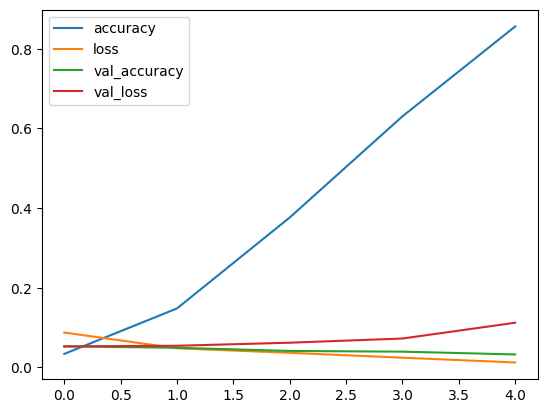

In [ ]:
# Check for the loss curve
import pandas as pd
pd.DataFrame(h1.history).plot()

> 🔑 **Note:** When a models **validation loss start to increase**, it's likely the model is **overfitting** the training dataset. This means it's learning pattern into training dataset **too well** and that's the models's ability to genralize to unseen data will be diminished.


# Setup the datasets
1. import the data
2. Extract the file
3. structure the dataset to train and test dataset

## import the data

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2025-10-23 07:00:15--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2025-10-23 07:00:15--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  30.0MB/s    in 7m 49s  

2025-10-23 07:08:04 (10.2 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



## extract the tar file


In [ ]:
import tarfile
tar_file_dir = 'food-101.tar.gz'
file_dir = tarfile.open(tar_file_dir)
file_dir.extractall()
file_dir.close()

/tmp/ipython-input-2409066663.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  file_dir.extractall()


In [22]:
import os
import json
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [23]:
# Check files and directories
food_dir = 'food-101'
image_dir = 'images'
images_dir = os.path.join(food_dir, image_dir)
for dirpath, dirnames, filenames in os.walk(images_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 101 directories and 0 files in food-101/images
There are 0 directories and 1000 files in food-101/images/dumplings
There are 0 directories and 1000 files in food-101/images/deviled_eggs
There are 0 directories and 1000 files in food-101/images/french_fries
There are 0 directories and 1000 files in food-101/images/hamburger
There are 0 directories and 1000 files in food-101/images/prime_rib
There are 0 directories and 1000 files in food-101/images/miso_soup
There are 0 directories and 1000 files in food-101/images/mussels
There are 0 directories and 1000 files in food-101/images/scallops
There are 0 directories and 1000 files in food-101/images/beef_tartare
There are 0 directories and 1000 files in food-101/images/baklava
There are 0 directories and 1000 files in food-101/images/tacos
There are 0 directories and 1000 files in food-101/images/sashimi
There are 0 directories and 1000 files in food-101/images/edamame
There are 0 directories and 1000 files in food-101/images/fried

### get classes

In [24]:
class_names = os.listdir(images_dir)
class_names

['dumplings',
 'deviled_eggs',
 'french_fries',
 'hamburger',
 'prime_rib',
 'miso_soup',
 'mussels',
 'scallops',
 'beef_tartare',
 'baklava',
 'tacos',
 'sashimi',
 'edamame',
 'fried_calamari',
 'chicken_curry',
 'pork_chop',
 'samosa',
 'croque_madame',
 'gnocchi',
 'ice_cream',
 'seaweed_salad',
 'pulled_pork_sandwich',
 'panna_cotta',
 'grilled_salmon',
 'french_toast',
 'cheese_plate',
 'spaghetti_carbonara',
 'frozen_yogurt',
 'pizza',
 'omelette',
 'red_velvet_cake',
 'escargots',
 'caprese_salad',
 'grilled_cheese_sandwich',
 'garlic_bread',
 'strawberry_shortcake',
 'filet_mignon',
 'poutine',
 'baby_back_ribs',
 'beef_carpaccio',
 'spring_rolls',
 'chicken_quesadilla',
 'waffles',
 'french_onion_soup',
 'falafel',
 'churros',
 'clam_chowder',
 'chocolate_cake',
 'onion_rings',
 'lasagna',
 'pho',
 'creme_brulee',
 'breakfast_burrito',
 'ramen',
 'ravioli',
 'chocolate_mousse',
 'donuts',
 'cheesecake',
 'bread_pudding',
 'macarons',
 'greek_salad',
 'cup_cakes',
 'beet_sala

###Get labels (in JSON) format

In [ ]:
def get_labels(label_path):
  """
  Accept a label path in the form of JSON and retrun in the form of python objec
  """
  with open(label_path) as f:
    return json.load(f)


In [ ]:
# Get the train and test labels
train_label_path = os.path.join(food_dir, 'meta', 'train.json')
test_label_path = os.path.join(food_dir, 'meta', 'test.json')
train_labels = get_labels(train_label_path)
test_labels = get_labels(test_label_path)
len(train_labels), len(test_labels), len(train_labels['apple_pie']),len(test_labels['apple_pie'])

(101, 101, 750, 250)

## Structure the dataset to train and test dataset
### Create a target class folder and move images there

In [ ]:
train_labels['pizza'][:5]

['pizza/1008104',
 'pizza/1008144',
 'pizza/1008844',
 'pizza/1008941',
 'pizza/1011404']

In [54]:
image_dir, food_dir

('images', 'food-101')

In [83]:
def copy_images(parent_folder, new_subset, dataset, target_labels):
  """
  Copies `labels[target_labels]` images from `parent_folder` to
  `new_subset` named after `dataset` folder

  E.g. move steak images to data/steak_subset/train && data/steak_subset/test

  Parameters
  ----------
  `parent_folder (str)` - orignal folder of the dataset
  `new_subset (str)` - name of parent folder to copy to
  `dataset (str)` - which dataset `train` or `test`
  `target_labels (list)` - list of target labels e.g. ['pizza', 'steak']
  """

  # Get the appropriate labels
  dataset_label = dataset+'.json'
  labels = get_labels('food-101/meta/'+ dataset+'.json')

  # Loop through target_labels
  for i in target_labels:
    # make target directory
    os.makedirs(os.path.join(parent_folder, new_subset, dataset, i), exist_ok=True)
    # Go through labels and get appropriate classes
    images_moved =[]
    for j in labels[i]:
      # Create orignal image path and new path
      og_path = os.path.join(food_dir, image_dir, j+'.jpg')
      new_path = os.path.join(parent_folder, new_subset, dataset, j+'.jpg')

      # Copy image from old path to new path
      shutil.copy2(og_path, new_path)
      images_moved.append(new_path)
    print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class..")


## Make 5% of dataset copy

In [25]:
parent_folder = 'data'
new_subset = 'food-101'
datasets = ['train', 'test']
target_labels = class_names[:5]
target_labels

['dumplings', 'deviled_eggs', 'french_fries', 'hamburger', 'prime_rib']

In [84]:
# Copy train and test images
for i in datasets:
  copy_images(parent_folder=parent_folder,
              new_subset=new_subset,
              dataset=i,
              target_labels=target_labels)


Copied 750 images from train dataset dumplings class..
Copied 750 images from train dataset deviled_eggs class..
Copied 750 images from train dataset french_fries class..
Copied 750 images from train dataset hamburger class..
Copied 750 images from train dataset prime_rib class..
Copied 250 images from test dataset dumplings class..
Copied 250 images from test dataset deviled_eggs class..
Copied 250 images from test dataset french_fries class..
Copied 250 images from test dataset hamburger class..
Copied 250 images from test dataset prime_rib class..


# Create food classification model


### Preporcess the dataset
Use data augmentation with 0.3 value to have a better learning path

In [4]:
# Generate image data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.3,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             shear_range=0.3,
                                             zoom_range=0.3,
                                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [5]:
# Get the training and testing dataset
train_data = train_datagen_augmented.flow_from_directory('data/food-101/train',
                                                         target_size=(224, 224),
                                                         class_mode='binary',
                                                         batch_size=32,
                                                         shuffle=True,
                                                         seed=42)
valid_data = test_datagen.flow_from_directory('data/food-101/test',
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32,
                                              seed=42)

Found 3750 images belonging to 5 classes.
Found 1250 images belonging to 5 classes.


In [118]:
images, labels = next(train_data)
len(images), len(labels), len(train_data), 3750/118, labels

(32,
 32,
 118,
 31.779661016949152,
 array([1., 1., 1., 0., 3., 2., 0., 3., 4., 3., 1., 2., 1., 0., 4., 2., 0.,
        1., 2., 0., 2., 3., 1., 1., 0., 2., 0., 1., 2., 3., 0., 1.],
       dtype=float32))

## Create the model
1. Create a model with 5 Conv2, and 5 MaxPool layers and the kernel size 3
2. Each layer must have 10 filters
3. train it for 5 epochs
4. keep padding `same`

In [6]:
from tensorflow.keras import Sequential, layers, activations
from tensorflow.keras.callbacks import TensorBoard

In [26]:
target_labels

['dumplings', 'deviled_eggs', 'french_fries', 'hamburger', 'prime_rib']

In [110]:
# 1. Create a model using sequential api
m1 = Sequential([
    # Input Layer
    layers.Conv2D(10,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='same'),
    # Layer 2
    layers.Conv2D(10,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='same'),
    # Layer 3
    layers.Conv2D(10,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='same'),
    # Layer 4
    layers.Conv2D(10,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='same'),
    # Layer 5
    layers.Conv2D(10,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='same'),
    # Flatt the layer
    layers.Flatten(),
    # Output layer
    layers.Dense(len(target_labels), activation=activations.softmax)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
m1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 490)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         2,455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,375 (24.90 KB)

 Trainable params: 6,375 (24.90 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# 2. Compile the model
m1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics=['accuracy'])

In [122]:
# 3. Fit the model
h1 = m1.fit(train_data,
            epochs=5,
            callbacks=[TensorBoard()],
            validation_data=valid_data,
            validation_steps=len(valid_data),
            steps_per_epoch=len(train_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.2147 - loss: 1.6120 - val_accuracy: 0.2704 - val_loss: 1.5780
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.2761 - loss: 1.5636 - val_accuracy: 0.4168 - val_loss: 1.3774
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.3605 - loss: 1.4731 - val_accuracy: 0.5128 - val_loss: 1.2623
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4181 - loss: 1.4017 - val_accuracy: 0.5528 - val_loss: 1.2098
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.4462 - loss: 1.3571 - val_accuracy: 0.5296 - val_loss: 1.2128


<Axes: >

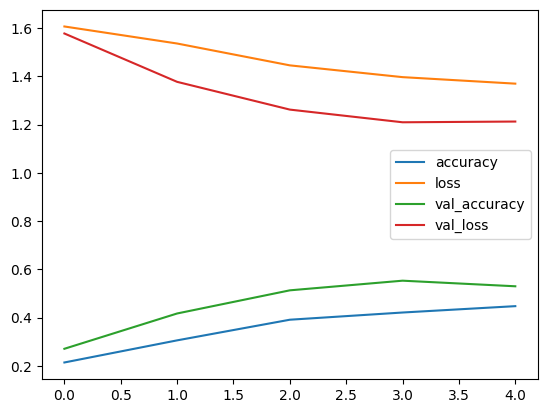

In [123]:
pd.DataFrame(h1.history).plot()

> ***it seems not performing well, let's train it on smaller without data aumentaion `valid' padding and 32 filters***




In [27]:
# Generate image data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.3,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             shear_range=0.3,
                                             zoom_range=0.3,
                                             horizontal_flip=True)
# Get the training and testing dataset
train_data_2 = train_datagen_augmented.flow_from_directory('data/food-101/train',
                                                         target_size=(224, 224),
                                                         class_mode='binary',
                                                         batch_size=32,
                                                         shuffle=True,
                                                         seed=42)
# 1. Create a model using sequential api
m2 = Sequential([
    # Input Layer
    layers.Conv2D(15,
                  kernel_size=3,
                  strides=1,
                  padding='valid',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='valid'),
    # Layer 2
    layers.Conv2D(15,
                  kernel_size=3,
                  strides=1,
                  padding='valid',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='valid'),
    # Layer 3
    layers.Conv2D(15,
                  kernel_size=3,
                  strides=1,
                  padding='valid',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    # layers.MaxPool2D(pool_size=2, padding='valid'),
    # Layer 4
    layers.Conv2D(15,
                  kernel_size=3,
                  strides=1,
                  padding='valid',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='valid'),
    # Layer 5
    layers.Conv2D(15,
                  kernel_size=3,
                  strides=1,
                  padding='valid',
                  activation= activations.relu,
                  input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=2, padding='valid'),
    # Flatt the layer
    layers.Flatten(),
    # Output layer
    layers.Dense(len(target_labels), activation=activations.softmax)
])

Found 3750 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# 2. Compile the model
m2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
           metrics=['accuracy'])

In [29]:
# 3. Fit the model
h2 = m2.fit(train_data_2,
            epochs=10,
            callbacks=[TensorBoard()],
            validation_data=valid_data,
            validation_steps=len(valid_data),
            steps_per_epoch=len(train_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.2122 - loss: 1.6006 - val_accuracy: 0.3952 - val_loss: 1.3900
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.3122 - loss: 1.5177 - val_accuracy: 0.4904 - val_loss: 1.2976
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.4076 - loss: 1.4229 - val_accuracy: 0.4768 - val_loss: 1.2783
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.4189 - loss: 1.3927 - val_accuracy: 0.5400 - val_loss: 1.1946
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.4538 - loss: 1.3434 - val_accuracy: 0.5400 - val_loss: 1.1645
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.4687 - loss: 1.3122 - val_accuracy: 0.5448 - val_loss: 1.1414
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.4676 - loss: 1.3116 - val_accuracy: 0.5864 - val_loss: 1.1184
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.4694 - loss: 1.3168 - val_accu

<Axes: >

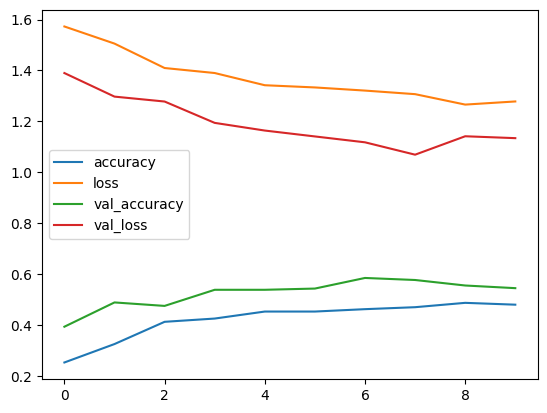

In [30]:
pd.DataFrame(h2.history).plot()

In [31]:
m2.evaluate(valid_data)

40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 530ms/step - accuracy: 0.5449 - loss: 1.1466


[1.1346805095672607, 0.5464000105857849]

In [32]:
m2.predict(valid_data)

40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 479ms/step


array([[0.08676064, 0.05491829, 0.7135528 , 0.12876609, 0.01600217],
       [0.12241532, 0.47505072, 0.23709153, 0.10337971, 0.06206273],
       [0.03110802, 0.04103528, 0.25814024, 0.27012086, 0.39959565],
       ...,
       [0.03712598, 0.8939832 , 0.02913638, 0.02347218, 0.01628209],
       [0.15952271, 0.0643703 , 0.43532404, 0.23025087, 0.11053212],
       [0.09997637, 0.20026816, 0.31164274, 0.22941126, 0.15870142]],
      dtype=float32)